In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC-AUC Score: 0.99737962659679


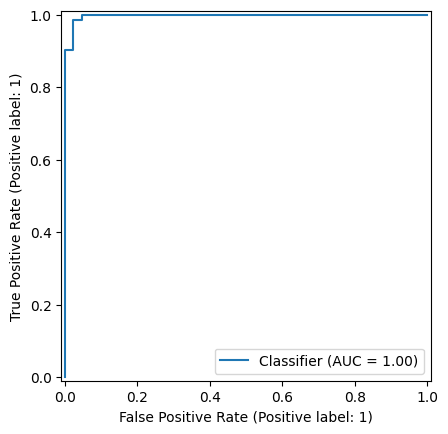

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, RocCurveDisplay

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)


In [5]:
import numpy as np

# Custom threshold
threshold = 0.6
y_pred_thresh = (y_prob >= threshold).astype(int)

# Evaluate with new threshold
print("Precision (threshold=0.6):", precision_score(y_test, y_pred_thresh))
print("Recall (threshold=0.6):", recall_score(y_test, y_pred_thresh))


Precision (threshold=0.6): 0.9859154929577465
Recall (threshold=0.6): 0.9859154929577465
